# Harmonic Linear Chain

The equation of motion for nth mass in the chain is given by:

\begin{equation}
    m_n \ddot{q}_{n} = k_n(q_{n+1}-q_n)-k_{n-1}(q_n-q_{n-1})
\end{equation}

Where $q_n$ is the nth mass' displacement from its equilibrium position. If we assume a normal mode solution we can form a matrix equation:

\begin{equation}
\begin{bmatrix}
    \ddots & \vdots & \vdots & \vdots  &  \\
     & & & & \\
    \dots & -k_{n-1}/m_n & (k_n+k_{n-1})/m_n & -k_n/m_n  & \dots \\
     & & & & \\
     & \vdots & \vdots & \vdots & \ddots
\end{bmatrix}
\begin{bmatrix}
    \vdots \\
    q_{n-1} \\
    q_n \\
    q_{n+1} \\
    \vdots
\end{bmatrix}
=
\omega^2
\begin{bmatrix}
    \vdots \\
    q_{n-1} \\
    q_n \\
    q_{n+1} \\
    \vdots
\end{bmatrix}
\end{equation}

Hence we find an eigenvalue problem which can be solved in the usual way. The eigenvectors obtained show the relative motion of the masses in the system. 

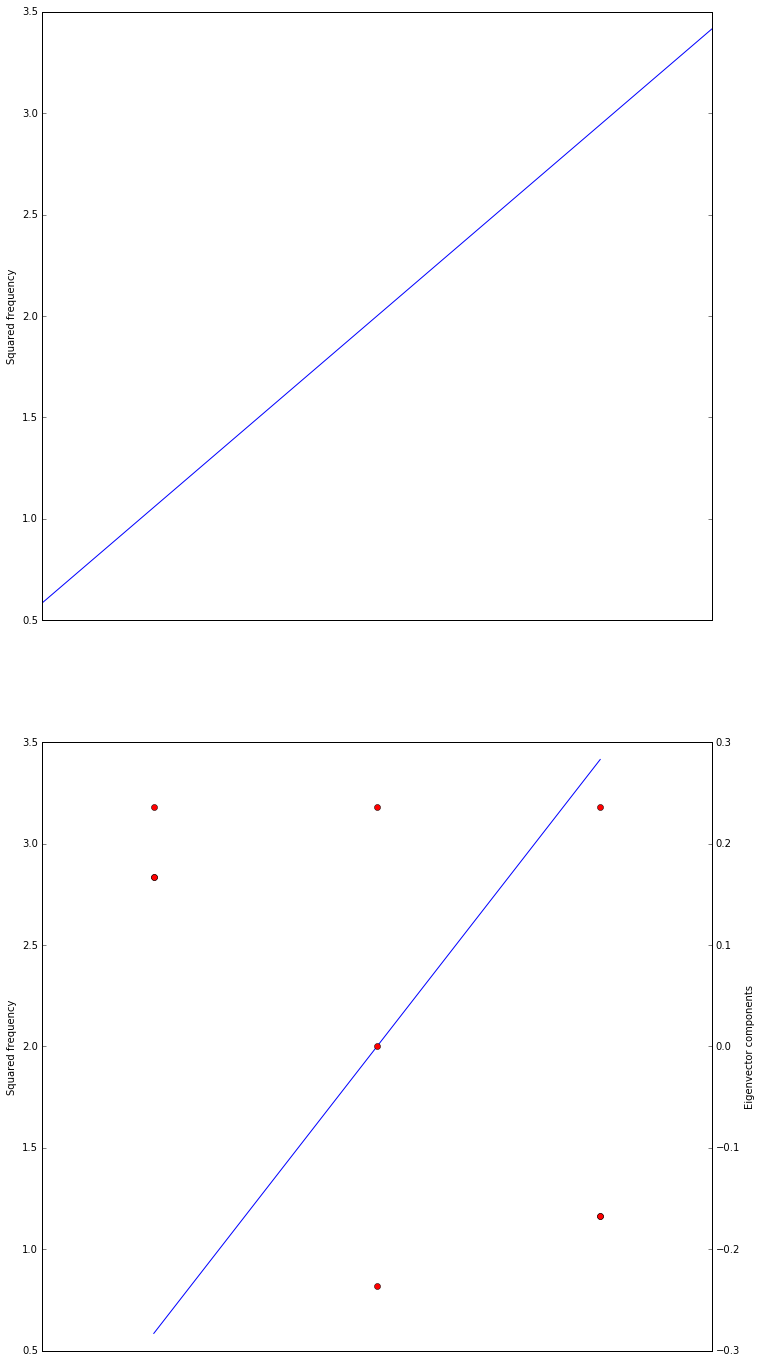

In [50]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def tridiag(a,b,c,i = [-1,0,1]):
    return np.diag(a,i[0])+np.diag(b,i[1])+np.diag(c,i[2])
    

def create_matrix(k,m):
    
    assert(k.shape[0] == m.shape[0]+1)
    
    N = m.shape[0]
    
    diagonal = -(k[:-1]+k[1:])/m
    upper_diag = k[1:-1]/m[:-1]
    lower_diag = k[1:-1]/m[1:]
    
    K = -1.0*tridiag(lower_diag,diagonal,upper_diag)
        
    return K
  
def normalise(m,eig_vecs):
    norm = np.sum(m*np.linalg.norm(eig_vecs,axis = 0)**2)
    return eig_vecs/norm

def sort_by_freq(eig_freq,eig_vecs):
    sort_indices = np.argsort(eig_freq)
    return eig_freq[sort_indices],eig_vecs[:,sort_indices]

def eigenanalysis(k,m):
    K = create_matrix(k,m)

    eig_freq,eig_vec = np.linalg.eig(K)
    eig_vec = normalise(m,eig_vec)

    eig_freq,eig_vec = sort_by_freq(eig_freq,eig_vec)
    
    return eig_freq,eig_vec

def plotter(eig_freq,eig_vec):
    fig = plt.figure(figsize = (12,24));
    ax1 = plt.subplot(212);
    ax1.set_xticks([])
    ax1.set_ylabel('Squared frequency')
    ax1.plot(eig_freq,'b');
    ax1.set_xlim((-0.5,len(eig_freq)-0.5));
    
    ax1_2 = plt.subplot(211);
    ax1_2.set_xticks([])
    ax1_2.set_ylabel('Squared frequency')
    ax1_2.plot(eig_freq,'b');
    ax2_2 = ax1.twinx();
    ax2_2.set_ylabel('Eigenvector components')
    ax2_2.plot(eig_vec.T,'ro');
    ax2_2.set_xlim((-0.5,len(eig_freq)-0.5));

k = np.ones(4)
m = np.ones(3)

eig_freq,eig_vec = eigenanalysis(k,m)

plotter(eig_freq,eig_vec)

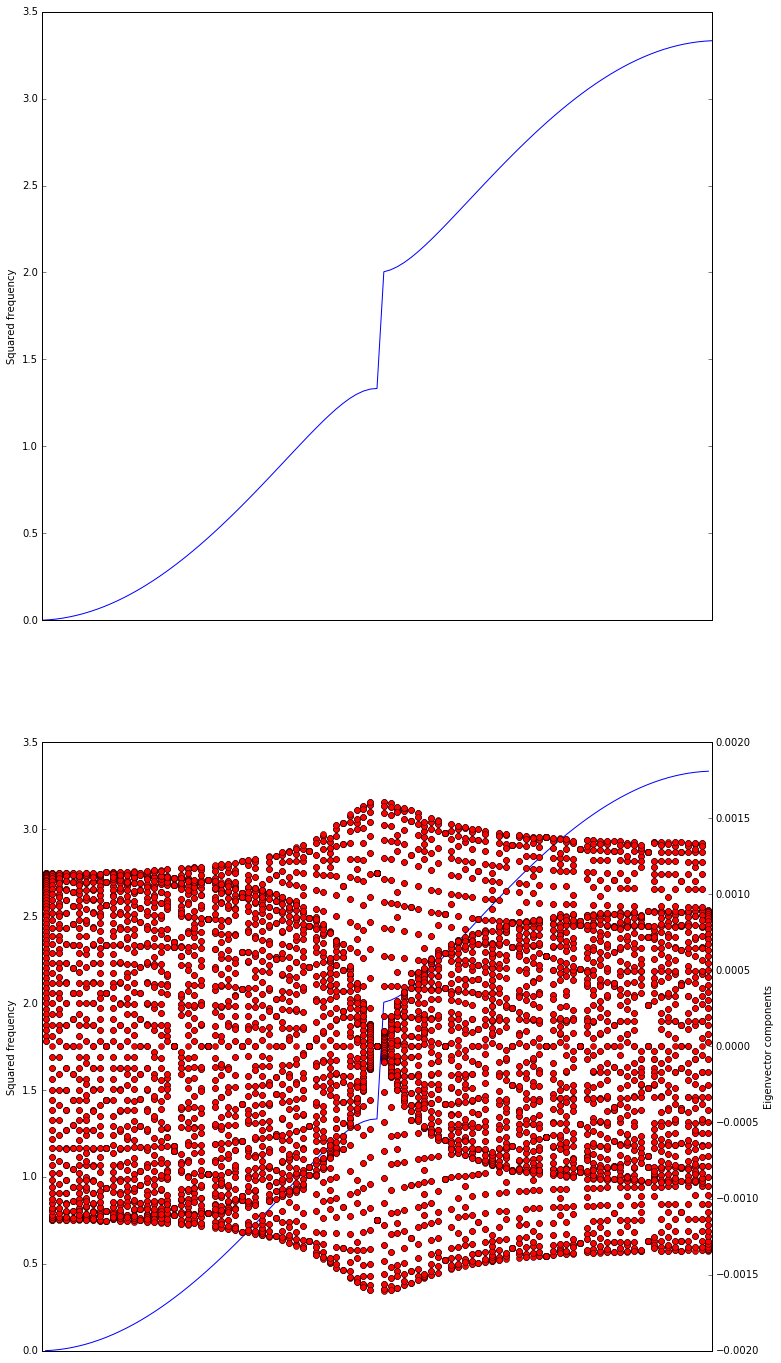

In [45]:
k = np.ones(100)
m = np.ones(99)
m[::2] = 1.5

eig_freq,eig_vec = eigenanalysis(k,m)

plotter(eig_freq,eig_vec)

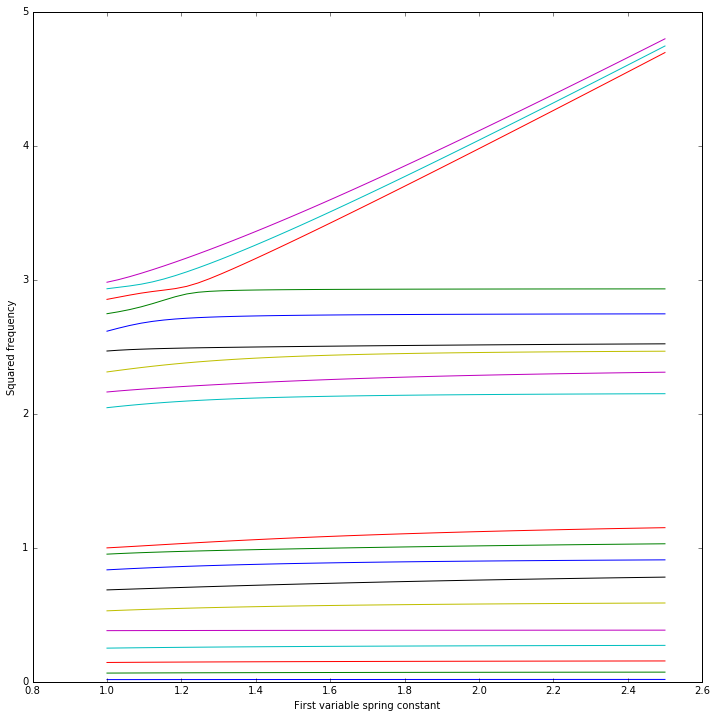

In [46]:
def freq_evolution(k,m,k_i,k_val):
    assert(len(k_i) == len(k_val))
    
    N_k = k_val[0].shape[0]
    eig_freqs = []
    
    for i in range(N_k):
        for j in range(len(k_i)):
            k[k_i[j]] = k_val[j][i]
        eig_freq,eig_vec = eigenanalysis(k,m)
        eig_freqs.append(eig_freq)
        
    fig = plt.figure(figsize = (12,12));
    ax1 = plt.subplot(111);
    ax1.set_xlabel('First variable spring constant')
    ax1.set_ylabel('Squared frequency')
    ax1.plot(k_val[0],eig_freqs);      
    

k = np.ones(20)
m = np.ones(19)
m[::2] = 2.

k_i = [2,6,9]
k_vals = np.linspace(1.,2.5,50)
k_val = [k_vals,]*len(k_i)

freq_evolution(k,m,k_i,k_val)